In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Vq2uXhLPD6XjkGUZc9xTAHmLJ5vYz3fbFDhNao67a0Og',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-xtisjugekzp5yj'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [72]:
df.drop(["Serial No."],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [74]:
x=df.iloc[:,:-1].values 
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [75]:
y=df.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [76]:
x.shape

(400, 7)

In [77]:

y.shape

(400,)

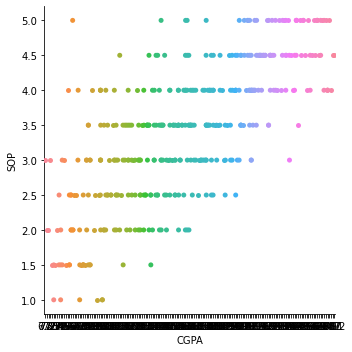

In [78]:
sns.catplot(x="CGPA",y="SOP",data=df)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [80]:
y_train=(y_train>0.5)

In [81]:
y_test=(y_test>0.5)

In [82]:
from sklearn.linear_model import LogisticRegression


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
reg1=DecisionTreeClassifier(random_state=0)

In [85]:
reg=LogisticRegression(random_state=0,max_iter=1000)

In [86]:
pred=reg.fit(X_train,y_train)

In [87]:
pred1=reg1.fit(X_train,y_train)

In [88]:
y_pred=pred.predict(X_test)

In [89]:
y_predtree=pred1.predict(X_test)


In [90]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [91]:
y_predtree

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [92]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("Accuracy Score (logistic regression):%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score(logistic regression):%f"%(recall_score(y_test,y_pred)*100))
print("roc (logistic regression):%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

Accuracy Score (logistic regression):96.250000
Recall score(logistic regression):100.000000
roc (logistic regression):70.000000
[[ 2  3]
 [ 0 75]]


In [93]:
print("Accuracy Score (decision tree):%f"%(accuracy_score(y_test,y_predtree)*100))
print("Recall score (decision tree):%f"%(recall_score(y_test,y_predtree)*100))
print("roc (decision tree):%f"%(roc_auc_score(y_test,y_predtree)*100))
print(confusion_matrix(y_test,y_predtree))

Accuracy Score (decision tree):88.750000
Recall score (decision tree):93.333333
roc (decision tree):56.666667
[[ 1  4]
 [ 5 70]]


In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
pred2=rfc.fit(X_train,y_train)
y_predrfc=pred2.predict(X_test)
y_predrfc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [95]:
print("Accuracy Score (Random forest):%f"%(accuracy_score(y_test,y_predrfc)*100))
print("Recall score (Random forest):%f"%(recall_score(y_test,y_predrfc)*100))
print("roc (Random forest):%f"%(roc_auc_score(y_test,y_predrfc)*100))
print(confusion_matrix(y_test,y_predrfc))

Accuracy Score (Random forest):95.000000
Recall score (Random forest):100.000000
roc (Random forest):60.000000
[[ 1  4]
 [ 0 75]]


In [96]:
from sklearn.neighbors import KNeighborsClassifier  
reg3= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
pred3=reg3.fit(X_train, y_train)  

In [97]:
y_predknn=pred3.predict(X_test)

In [98]:
y_predknn

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [99]:
print("Accuracy Score (k nearest neighbour):%f"%(accuracy_score(y_test,y_predknn)*100))
print("Recall score (k nearest neighbour)):%f"%(recall_score(y_test,y_predknn)*100))
print("roc (k nearest neighbour):%f"%(roc_auc_score(y_test,y_predknn)*100))
print(confusion_matrix(y_test,y_predknn))

Accuracy Score (k nearest neighbour):93.750000
Recall score (k nearest neighbour)):98.666667
roc (k nearest neighbour):59.333333
[[ 1  4]
 [ 1 74]]


In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [102]:
classifier = Sequential()

In [103]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [104]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [105]:
classifier.add(Dense(kernel_initializer='uniform', activation='relu', input_dim=7,units=7))
classifier.add(Dropout(rate=0.1))

In [106]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [107]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0         
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dropout_4 (Dropout)         (None, 7)                 0         
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dropout_5 (Dropout)         (None, 7)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [108]:
history=classifier.fit(X_train, y_train, batch_size=32,epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.8906
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.9062
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.9062
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.9062
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.9062
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.9062
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.9062
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.9062
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.9062
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.9062
Epoch 11/50
10/10 [

In [109]:
y_pred4=classifier.predict(X_test)
y_pred4

array([[0.7675744 ],
       [0.99876887],
       [0.7779143 ],
       [0.7606007 ],
       [0.7491059 ],
       [0.8336744 ],
       [1.        ],
       [0.9999989 ],
       [0.99996966],
       [0.8379176 ],
       [0.9953885 ],
       [0.99996585],
       [0.9495839 ],
       [0.8277683 ],
       [0.9999968 ],
       [0.9999974 ],
       [0.7381005 ],
       [0.99047804],
       [0.9998194 ],
       [0.9984891 ],
       [0.99999297],
       [0.99930835],
       [0.9987721 ],
       [0.9900489 ],
       [0.9917507 ],
       [0.9272181 ],
       [0.7931123 ],
       [0.9999986 ],
       [0.8491808 ],
       [0.9215331 ],
       [0.9997252 ],
       [0.9782571 ],
       [0.98187494],
       [0.99262536],
       [0.7726737 ],
       [0.9999634 ],
       [0.77670777],
       [0.87060446],
       [0.95616186],
       [0.9993253 ],
       [0.9999992 ],
       [0.9996818 ],
       [0.97339183],
       [0.84977305],
       [0.8403559 ],
       [0.9886937 ],
       [0.87089634],
       [0.804

In [110]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15412412583827972
Test accuracy: 0.9375


In [111]:
import pickle
pickle.dump(pred2,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

In [112]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [113]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey": "2hl0Dnbl1E4wMzjos2DjZz65xZhEtPqrYTyeub_VYlbi"
}
client = APIClient(wml_credentials)

In [114]:
def guid_from_space_name(client, space_name):
 space = client.spaces.get_details()
 return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [122]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = "+ space_uid)

Space UID = e98f8e76-b9d3-441d-91ef-21708cd61c81


In [123]:
client.set.default_space(space_uid)

'SUCCESS'

In [124]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [125]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [126]:
software_spec_uid= client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [129]:
model_props={
client.repository.ModelMetaNames.NAME:'UAEL',
client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [131]:
models_details=client.repository.store_model(
model=rfc,
meta_props=model_props,
training_data=X_train,
training_target=y_train
)

In [132]:
models_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 'container'}],
  'type': 'scikit-learn_1.0'},
 'metad